
--- Raw Student Data ---
    Student_ID       Name  Maths  Physics  Chemistry  Attendance
0          101   Student1     78       82         75          88
1          102   Student2     65       70         58          72
2          103   Student3     90       92         88          95
3          104   Student4     55       60         58          65
4          105   Student5     85       80         82          90
5          106   Student6     72       68         70          85
6          107   Student7     40       45         42          60
7          108   Student8     88       85         90          92
8          109   Student9     62       58         60          75
9          110  Student10     95       94         96          98
10         111  Student11     48       50         52          62
11         112  Student12     70       75         73          80
12         113  Student13     66       64         68          78
13         114  Student14     82       80         85          88

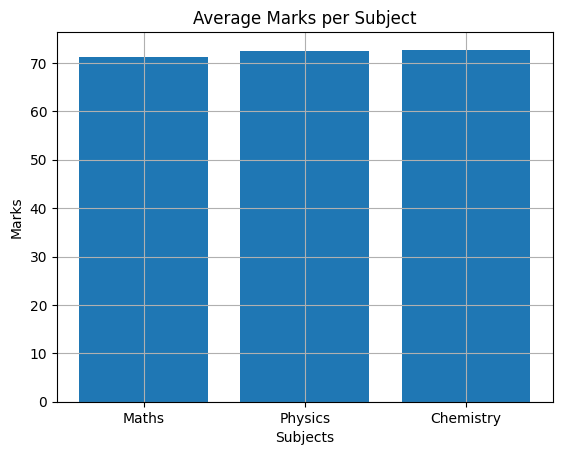

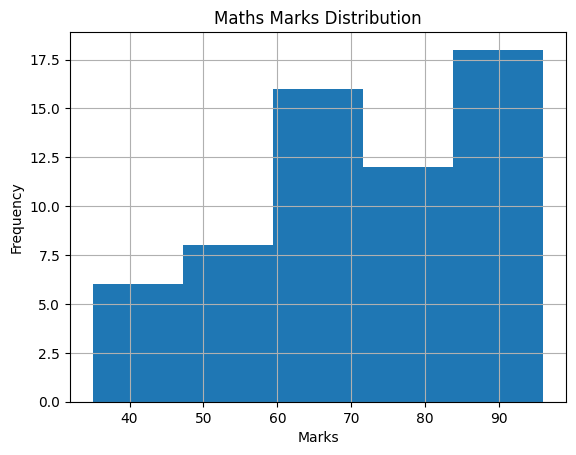

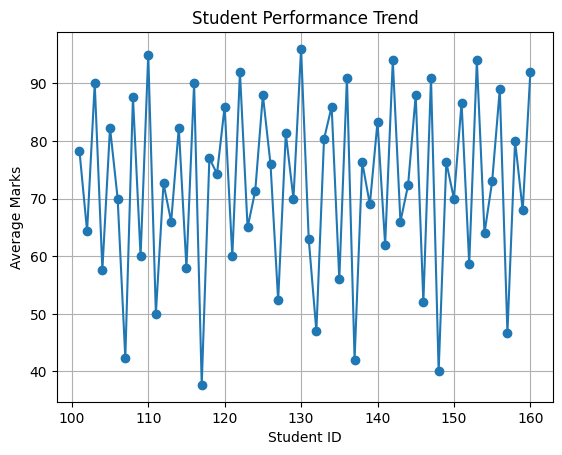

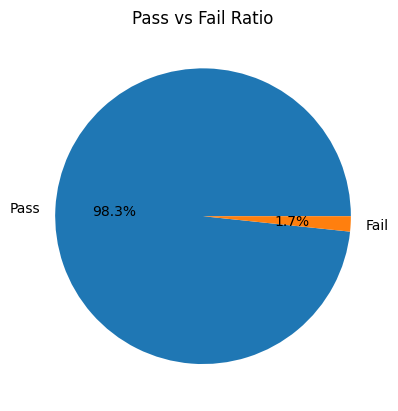


--- Analysis Completed Successfully ---
Correlation: 0.9858654975955683
Mean Marks: [71.26666667 72.56666667 72.73333333]
75th Percentile: [85.25 86.25 86.5 ]

Students with Low Scores:
                 Name  Maths  Physics  Chemistry  Attendance    Average  Rank
Student_ID                                                                   
102          Student2     65       70         58          72  64.333333  42.0
104          Student4     55       60         58          65  57.666667  50.0
107          Student7     40       45         42          60  42.333333  57.0
109          Student9     62       58         60          75  60.000000  46.5
111         Student11     48       50         52          62  50.000000  54.0
115         Student15     59       55         60          70  58.000000  49.0
117         Student17     35       40         38          55  37.666667  60.0
121         Student21     58       60         62          68  60.000000  46.5
127         Student27     52     

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_name = "Dataset.csv"
data = pd.read_csv(file_name)

print("\n--- Raw Student Data ---")
print(data)



data.fillna(data.mean(numeric_only=True), inplace=True)

data.set_index("Student_ID", inplace=True)

subjects = ("Maths", "Physics", "Chemistry")

data["Average"] = data[list(subjects)].mean(axis=1)

data["Rank"] = data["Average"].rank(ascending=False)

correlation = data["Attendance"].corr(data["Average"])




marks_array = data[list(subjects)].to_numpy()


original_shape = marks_array.shape
reshaped_array = marks_array.reshape(marks_array.shape[0], -1)
flattened_array = reshaped_array.flatten()


mean_marks = np.mean(marks_array, axis=0)
median_marks = np.median(marks_array, axis=0)
std_marks = np.std(marks_array, axis=0)
variance_marks = np.var(marks_array, axis=0)


normalized_marks = (marks_array - mean_marks) / std_marks


percentile_75 = np.percentile(marks_array, 75, axis=0)


sorted_marks = np.sort(marks_array, axis=0)
low_score_mask = marks_array < 60
students_with_low_scores = data[low_score_mask.any(axis=1)]


data["Performance"] = np.where(
    data["Average"] >= 75, "Excellent",
    np.where(data["Average"] >= 60, "Good", "Needs Improvement")
)


data["Status"] = np.where(data["Average"] >= 40, "Pass", "Fail")


high_attendance_good_marks = np.logical_and(
    data["Attendance"] > 85,
    data["Average"] > 70
)


structured_dtype = [('Maths', int), ('Physics', int), ('Chemistry', int)]
structured_array = np.array(
    [tuple(row) for row in marks_array.astype(int)],
    dtype=structured_dtype
)

np.save("normalized_marks.npy", normalized_marks)
np.savetxt("sorted_marks.txt", sorted_marks, fmt='%d')



# Bar Chart – Subject averages
plt.figure()
plt.bar(subjects, mean_marks)
plt.title("Average Marks per Subject")
plt.xlabel("Subjects")
plt.ylabel("Marks")
plt.grid(True)
plt.savefig("subject_average.png")
plt.show()

# Histogram – Maths marks
plt.figure()
plt.hist(data["Maths"], bins=5)
plt.title("Maths Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig("maths_histogram.png")
plt.show()

# Line Chart – Student average trend
plt.figure()
plt.plot(data["Average"], marker='o')
plt.title("Student Performance Trend")
plt.xlabel("Student ID")
plt.ylabel("Average Marks")
plt.grid(True)
plt.savefig("performance_trend.png")
plt.show()

# Pie Chart – Pass vs Fail
pass_count = len(data[data["Status"] == "Pass"])
fail_count = len(data[data["Status"] == "Fail"])

plt.figure()
plt.pie(
    [pass_count, fail_count],
    labels=["Pass", "Fail"],
    autopct='%1.1f%%'
)
plt.title("Pass vs Fail Ratio")
plt.savefig("pass_fail_pie.png")
plt.show()


data.to_excel("final_report.xlsx")

with open("summary.txt", "w") as f:
    f.write("Academic Performance Summary\n")
    f.write("----------------------------\n")
    f.write(f"Attendance vs Performance Correlation: {correlation}\n")
    f.write(f"Mean Marks: {mean_marks}\n")
    f.write(f"Students with Low Scores: {len(students_with_low_scores)}\n")


print("\n--- Analysis Completed Successfully ---")
print("Correlation:", correlation)
print("Mean Marks:", mean_marks)
print("75th Percentile:", percentile_75)
print("\nStudents with Low Scores:")
print(students_with_low_scores)